### 2.8.1 Numpy中的快速排序：np.sort 和 np.argsort

In [1]:
import numpy as np

In [2]:
x = np.array([2,1,5,4,3])#不修改原始数组的基础上返回一个排好的数组
np.sort(x)

array([1, 2, 3, 4, 5])

In [3]:
x.sort()
print(x)#用排好的数组代替原始数组

[1 2 3 4 5]


In [4]:
#返回原始数组排好的索引值：
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


沿着行或列排序

In [3]:
rand =np.random.RandomState(42)
X =np.random.randint(0,10,(4,6))
print(X)

[[6 1 9 3 3 7]
 [9 7 4 9 4 5]
 [2 9 6 3 3 1]
 [2 7 1 0 6 3]]


In [4]:
#对X的每一列排序
np.sort(X,axis=0) #从大到小

array([[2, 1, 1, 0, 3, 1],
       [2, 7, 4, 3, 3, 3],
       [6, 7, 6, 3, 4, 5],
       [9, 9, 9, 9, 6, 7]])

In [5]:
#对行排序
np.sort(X,axis=1)

array([[1, 3, 3, 6, 7, 9],
       [4, 4, 5, 7, 9, 9],
       [1, 2, 3, 3, 6, 9],
       [0, 1, 2, 3, 6, 7]])

In [6]:
'''上述处理将行或者列当作独立的数组，任何行或列的值之间的关系将会丢失'''

'上述处理将行或者列当作独立的数组，任何行或列的值之间的关系将会丢失'

### 2.8.2 部分排序：分隔

In [7]:
#有时候不需要排序，二十找到数组中第K小的值：np.partition
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)#第几小的数 这里是第三小 输出结果是新数组，最左边是第k小的值，往右是任意顺序的其他值

array([2, 1, 3, 4, 6, 5, 7])

In [8]:
#也可以沿着多维数组任意的轴进行分隔
np.partition(X,2,axis=1)

array([[1, 3, 3, 6, 9, 7],
       [4, 4, 5, 9, 7, 9],
       [1, 2, 3, 6, 3, 9],
       [0, 1, 2, 7, 6, 3]])

### 2.8.3 demo:K个最近邻

In [9]:
import numpy as np

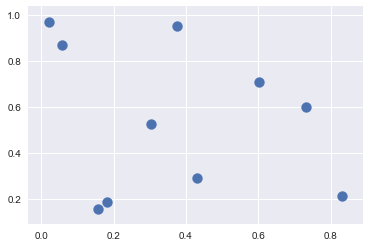

In [10]:
X = rand.rand(10,2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()#设置绘画风格
plt.scatter(X[:,0],X[:,1],s = 100);

In [11]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2 , axis= -1)

In [12]:
difference = X[:, np.newaxis, :] - X[np.newaxis, : , :]
difference.shape

(10, 10, 2)

In [13]:
sq_differences = difference ** 2
sq_differences.shape

(10, 10, 2)

In [14]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [15]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [17]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis= 1)

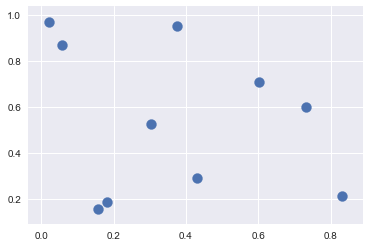

In [18]:
plt .scatter(X[:,0],X[:,1], s= 100)

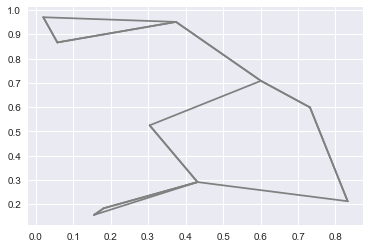

In [20]:
#将每个点与他最近的两个点相连
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color = "gray")